<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/regression_basics_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For Background on the Dataset see: https://cps.ipums.org/cps-action/variables/group

### **Clone Library**

In [1]:
!git clone https://github.com/pharringtonp19/business-analytics.git

Cloning into 'business-analytics'...
remote: Enumerating objects: 956, done.
remote: Counting objects: 100% (573/573), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 956 (delta 420), reused 428 (delta 328), pack-reused 383 (from 1)
Receiving objects: 100% (956/956), 18.26 MiB | 16.28 MiB/s, done.
Resolving deltas: 100% (548/548), done.


### **Import Packages**

In [20]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

### **Read In Data Set**

In [7]:
df = pd.read_csv('/content/business-analytics/datasets/brookline.csv')
df.head()

,price,stNumber,stName,size,beacon,baseFloor,buildingStyle,elevators,rooms,bedrooms,fullBathrooms,halfBathrooms,garage
0,174000,150,PLEASANT ST,1060,0,4,MID-RISE,1,4,2,1,1,1.0
1,337000,7,LEVERETT ST,831,0,1,DECKER,0,4,2,1,0,0.0
2,850000,24,EUSTON ST,2246,0,1,ROW-END,0,10,6,3,0,0.0
3,516000,417,WASHINGTON ST,1574,0,2,LOW-RISE,0,6,3,2,0,0.0
4,145000,150,PLEASANT ST,669,0,4,MID-RISE,1,3,1,1,0,1.0


### **Fitting the Model**



Fill in the following code to create a Scatterplot of Size and Price

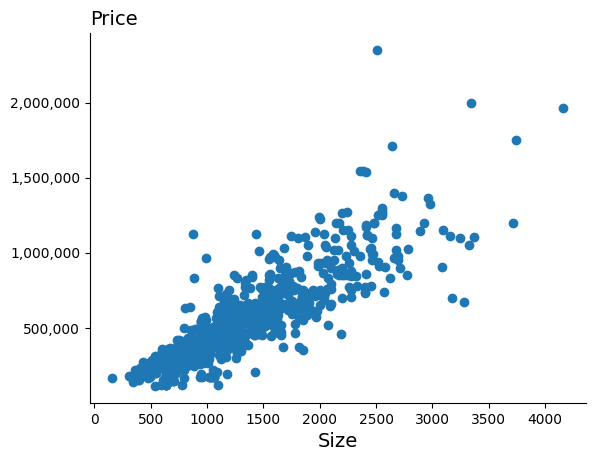

In [36]:
### ADD SCATTER PLOT HERE
plt.scatter(df['size'], df['price'])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.show()

Use the following code to fit the linear model:

$$\text{Price}_i = \beta_0 + \beta_1 \text{Size}_i + ɛ_i$$

In [39]:
#reg = smf.ols('[Insert Dependent/Outcome Variable] ~ [Insert Independent Variable/Control/Feature]', data = df).fit()
reg = smf.ols('price ~ size', data = df).fit()


### PRINT FITTED PARAMETERS
print(f"Fitted Parameters: {reg.params.values}")

### PRESENT RESULTS
print(summary_col([reg],
                  stars=True,
                  float_format='%0.2f'))

Fitted Parameters: [12934.12402325   407.45133328]

                 price  
------------------------
Intercept      12934.12 
               (9705.71)
size           407.45***
               (7.17)   
R-squared      0.75     
R-squared Adj. 0.75     
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


The Following Code Visualizes the Objective Function

In [51]:
import plotly.graph_objects as go
import numpy as np
import jax.numpy as jnp
import jax

# Your code for defining the functions and creating data points
def model(params, x):
    return params[0] + x * params[1]

def loss_function(params, xs, ys_true):
    ys_pred = model(params, xs)
    return jnp.mean((ys_true - ys_pred) ** 2)

# Create data points
xs = jnp.array(df['size'].values)
ys_true = jnp.array(df['price'].values)

# Define parameter ranges and create a grid
intercepts = jnp.linspace(0, 20_000, 100)
slopes = jnp.linspace(0, 1000, 100)
intercepts_grid, slopes_grid = jnp.meshgrid(intercepts, slopes)

# Vectorize the loss computation over the grid
params_grid = jnp.stack([intercepts_grid.ravel(), slopes_grid.ravel()], axis=-1)
loss_values = jax.vmap(lambda params: loss_function(params, xs, ys_true))(params_grid)
loss_values = loss_values.reshape(intercepts_grid.shape)

# Get optimal parameters from regression
eqn = smf.ols('price ~ size', data=df)
results = eqn.fit()
optimal_intercept, optimal_slope = results.params['Intercept'], results.params['size']
optimal_loss = float(loss_function([optimal_intercept, optimal_slope], xs, ys_true))

# Create the Plotly figure
fig = go.Figure()

# Add the surface for loss values
fig.add_trace(go.Surface(
    z=loss_values,
    x=intercepts_grid,
    y=slopes_grid,
    colorscale='Viridis',
    opacity=0.8,
    name="Loss Surface"
))

# Add the optimal point
fig.add_trace(go.Scatter3d(
    x=[optimal_intercept],
    y=[optimal_slope],
    z=[optimal_loss],
    mode='markers',
    marker=dict(size=8, color='red'),
    name="Optimal Parameters"
))

# Customize layout
fig.update_layout(
    title="3D Loss Surface with Optimal Parameters",
    scene=dict(
        xaxis_title="Intercept",
        yaxis_title="Slope",
        zaxis_title="Loss (MSE)"
    )
)

# Show the plot
fig.show()

### **Model Predictions**



Complete the following function and call it on the estimated parameter values

In [58]:
def model(params, x):
  pass


 Use `.fittedvalues` to overlay the line of best fit using `plt.plot`

 $$ \hat{Price} = \hat{\beta}_0 + \hat{\beta}_1\text{size} $$

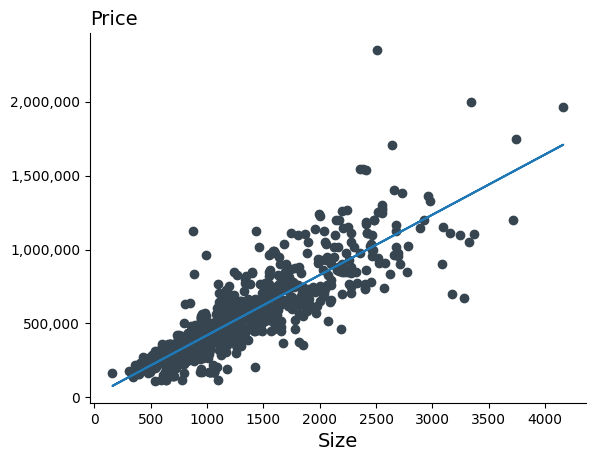

In [42]:
plt.scatter(df['size'], df['price'], color="#36454F")
### ADD SCATTER PLOT HERE
plt.plot(df['size'], reg.fittedvalues)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.show()

### **Model Understanding**



Divide the covariance of Price and Size by the variance of Size. How does this relate to the slope parameters?

In [44]:
df['price'].cov(df['size']) / df['size'].var()

407.4513332776437

Compute the average residual

$$r_i(\beta_0, \beta_1) = y_i - (\beta_0 + \beta_1 x_i)$$

In [43]:
reg.resid.mean()

3.364778334094632e-10

Use `.resid` to create a scatter plot of Size and the Residual Values



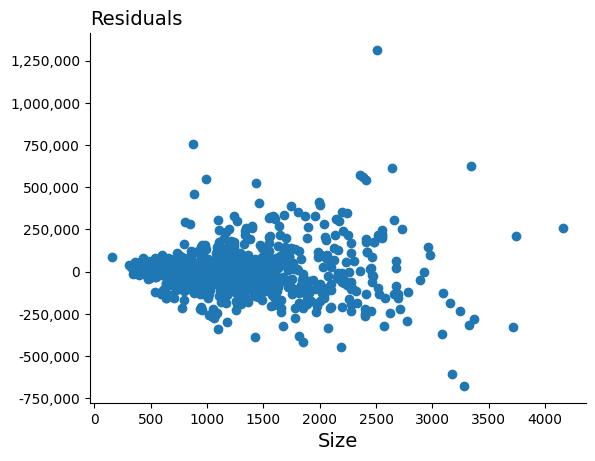

In [29]:
### ADD SCATTER PLOT HERE
plt.scatter(df['size'], reg.resid)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Residuals', loc='left', size=14)
plt.show()

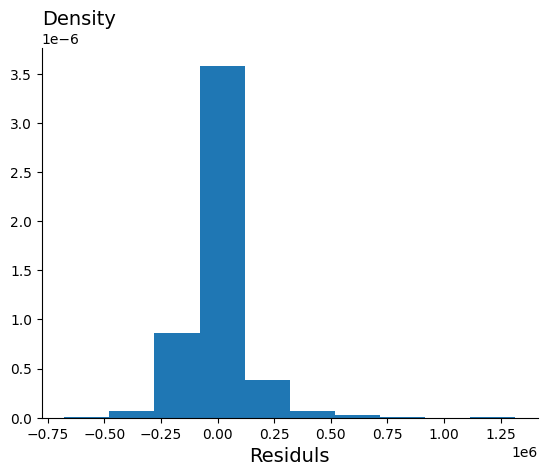

In [57]:
### ADD HISTOGRAM HERE
plt.hist(reg.resid, density=True)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Residuls', size=14)
plt.title('Density', loc='left', size=14)
plt.show()

Regress the residuals on size. Do the results surprise you?

In [32]:
### ADD RESIDUALS AS NEW COLUMN TO DATAFRAME
df['resid'] = reg.resid

### REGRESS THE RESIDUALS ON THE SIZE AND EXTRACT THE FITTED PARAMETERS IN ONE STEP
smf.ols('resid ~ size', data=df).fit().params

,0
Intercept,-3.025523e-11
size,3.032155e-13
